# Krzywa Kocha w 3 wymiarach (Delta Fractal)
## Alternatywna konstrukcja krzywej Kocha w 2 wymiarach 

![tekst](kochwew.png)

## Konstrukcja odpowiednika w 3 wymiarach
![tekst](ostro.png)

![tekst](slup.png)

## Konstrukcja
1. Zaczynamy od 2 ostrosłupów o wspólnej podstawie trójkąta równobocznego i pozostałych krawędziach jednakowej długości równej $\frac{2}{3}$ długości podstawy
2. Wycinamy z każdej krawędzi podstawy środkowy odcinek o długości $\frac{1}{9}$
3. Łączymy nowo powstałe końce krawędzi z wierzchołkami na przeciw podstawy w skutek czego otrzymujemy 3 kopie pierwotnej bryły

## Wymiar Hausdorffa
- $H^s(F) = \left(\frac{2}{3}\right)^sH^s(E)$      
- $H^s(F) = \frac{1}{3}H^s(E)$
  
gdzie $E$ to pełny fraktal a $F$ to jego samopodobny podzbiór powstały przy jednej iteracji,

czyli zakładając, że  $0 < H^s(E) <\infty$

$s= \log_{\frac{3}{2}}3=\frac{\log 3}{\log 3 - \log 2} \approx 2.71$

Obliczony wymiar implikuje, że powierzchnia naszego obiektu jest nieskończona natomiast objętość wynosi 0.

## Właściwości
- Samopodobieństwo – składa się z 3 mniejszych części, z których każda sama jest delta-fraktalem
- Nieskończona powierzchnia w skończonym obszarze trójwymiarowym
- Zerowa objętość
- Nie można określić płaszczyzny stycznej do krzywej
- Nieskończona odległość między dowolnymi dwoma punktami na krzywej – znajduje się między nimi pewien ordzaj krzywej Kocha

![tekst](sciana.png)

# Generowanie


In [ ]:
from math import *
import numpy as np
def five_p_to_six_t(points): #dostaje na wejściu listę 5 punktów konstytuujących początkową figurę i przedstawia ją jako listę 6 trójkątów
    A = points[0]
    B = points[1]
    C = points[2]
    D = points[3]
    E = points[4]
    triangles = [[A,B,D], [B,C,D], [C,A,D], [B, A, E], [A, C, E], [C, B, E]]
    return triangles
def five_p_to_fifteen_p(points): #dostaje na wejśćiu listę 5 punktów konstytuujących początkową figurę i zwraca 3-elementową liste z pomniejszonymi
    #kopiami początkowego kształtu
    A = points[0]
    B = points[1]
    C = points[2]
    D = points[3]
    E = points[4]
    AB=(5*A+4*B)/9
    BA=(5*B+4*A)/9
    BC=(5*B+4*C)/9
    CB=(5*C+4*B)/9
    CA=(5*C+4*A)/9
    AC=(5*A+4*C)/9
    p=[E,D,A,AB,AC]
    d=[E,D,B,BC,BA]
    t=[E,D,C,CA,CB]
    return [p,d,t]
    
def generate_fractal(stacked_pyramid, iterations): #przyjmuje początkowy kształt i liczbę iteracji, zwraca listę pomniejszonych kopii początkowego kształtu 
    #, na które składa się dana iteracja
    fractal = [stacked_pyramid]
    for i in range(iterations):
        real_index = 0
        for j in range(len(fractal)):
            pyramids = five_p_to_fifteen_p(fractal[real_index])
            del fractal[real_index]
            fractal.insert(real_index, pyramids[0])
            fractal.insert(real_index, pyramids[1])
            fractal.insert(real_index, pyramids[2])
            real_index = real_index + 3
    return fractal
def generate_triangles(fractal): #zamienia listę 5 punktów na listę trójkątów by ułatwić potem rysowanie
    triangles = []
    for stacked_pyramid in fractal:
        drejkanty = five_p_to_six_t(stacked_pyramid)
        for triangle in drejkanty:
            triangles.append(triangle)
    return triangles
        
    
    
    
    


# Rysowanie

In [4]:
import plotly.graph_objects as go

def plotTriangle(triangles):
    fig = go.Figure()
    for triangle in triangles:
        
        x = [vertex[0] for vertex in triangle]
        y = [vertex[1] for vertex in triangle]
        z = [vertex[2] for vertex in triangle]
        
        fig.add_trace(go.Mesh3d(
            x=x,  
            y=y,  
            z=z,  
            color='cyan', 
            opacity=1,  
            i=[0],  
            j=[1],  
            k=[2],  
        ))
    fig.update_layout(
    scene=dict(
            xaxis=dict(title='X', range=[-3, 3]),  # Custom X-axis limits
            yaxis=dict(title='Y', range=[-3, 3]),  # Custom Y-axis limits
            zaxis=dict(title='Z', range=[-3, 3]),  # Custom Z-axis limits
            aspectmode='cube'  # Equal scale for all axes
        ),
    title="Koch Curve in 3D"
    )
    fig.show()

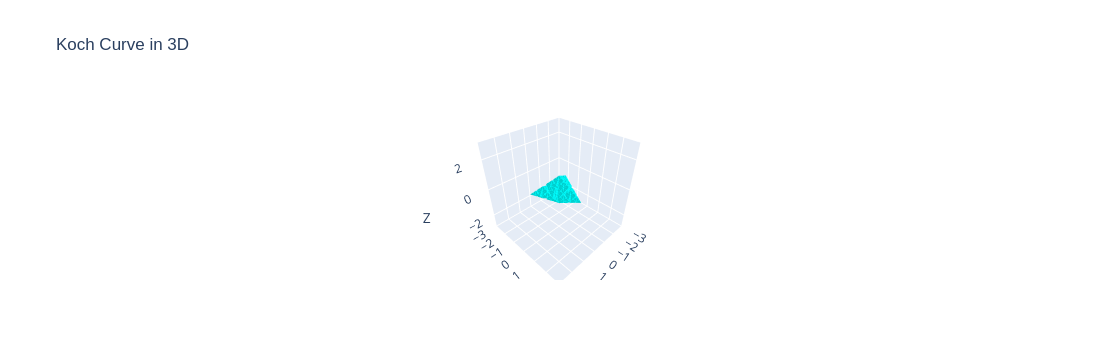

In [6]:
plotTriangle(generate_triangles(generate_fractal(points,6)))